En esta lección, nos centraremos en cómo manejar los datos duplicados.

Usaremos el dataset music_log_raw.csv en su versión sin procesar, sin ningún cambio en los nombres de las columnas ni valores ausentes. En la vida real, no empezaríamos por tratar de eliminar los duplicados. Más bien, primero cambiaríamos el nombre de las columnas, luego procederíamos a eliminar los valores NaN y finalmente puliríamos nuestro conjunto de datos eliminando los duplicados, lo que aprenderás a hacer en esta lección.

Al final de esta lección, podrás usar los métodos duplicated(), drop_duplicates(), reset_index(), unique() y nunique() para trabajar con duplicados en tus datos.

Detección de casos obvios
Recuerda esos duplicados que vimos al principio del capítulo:

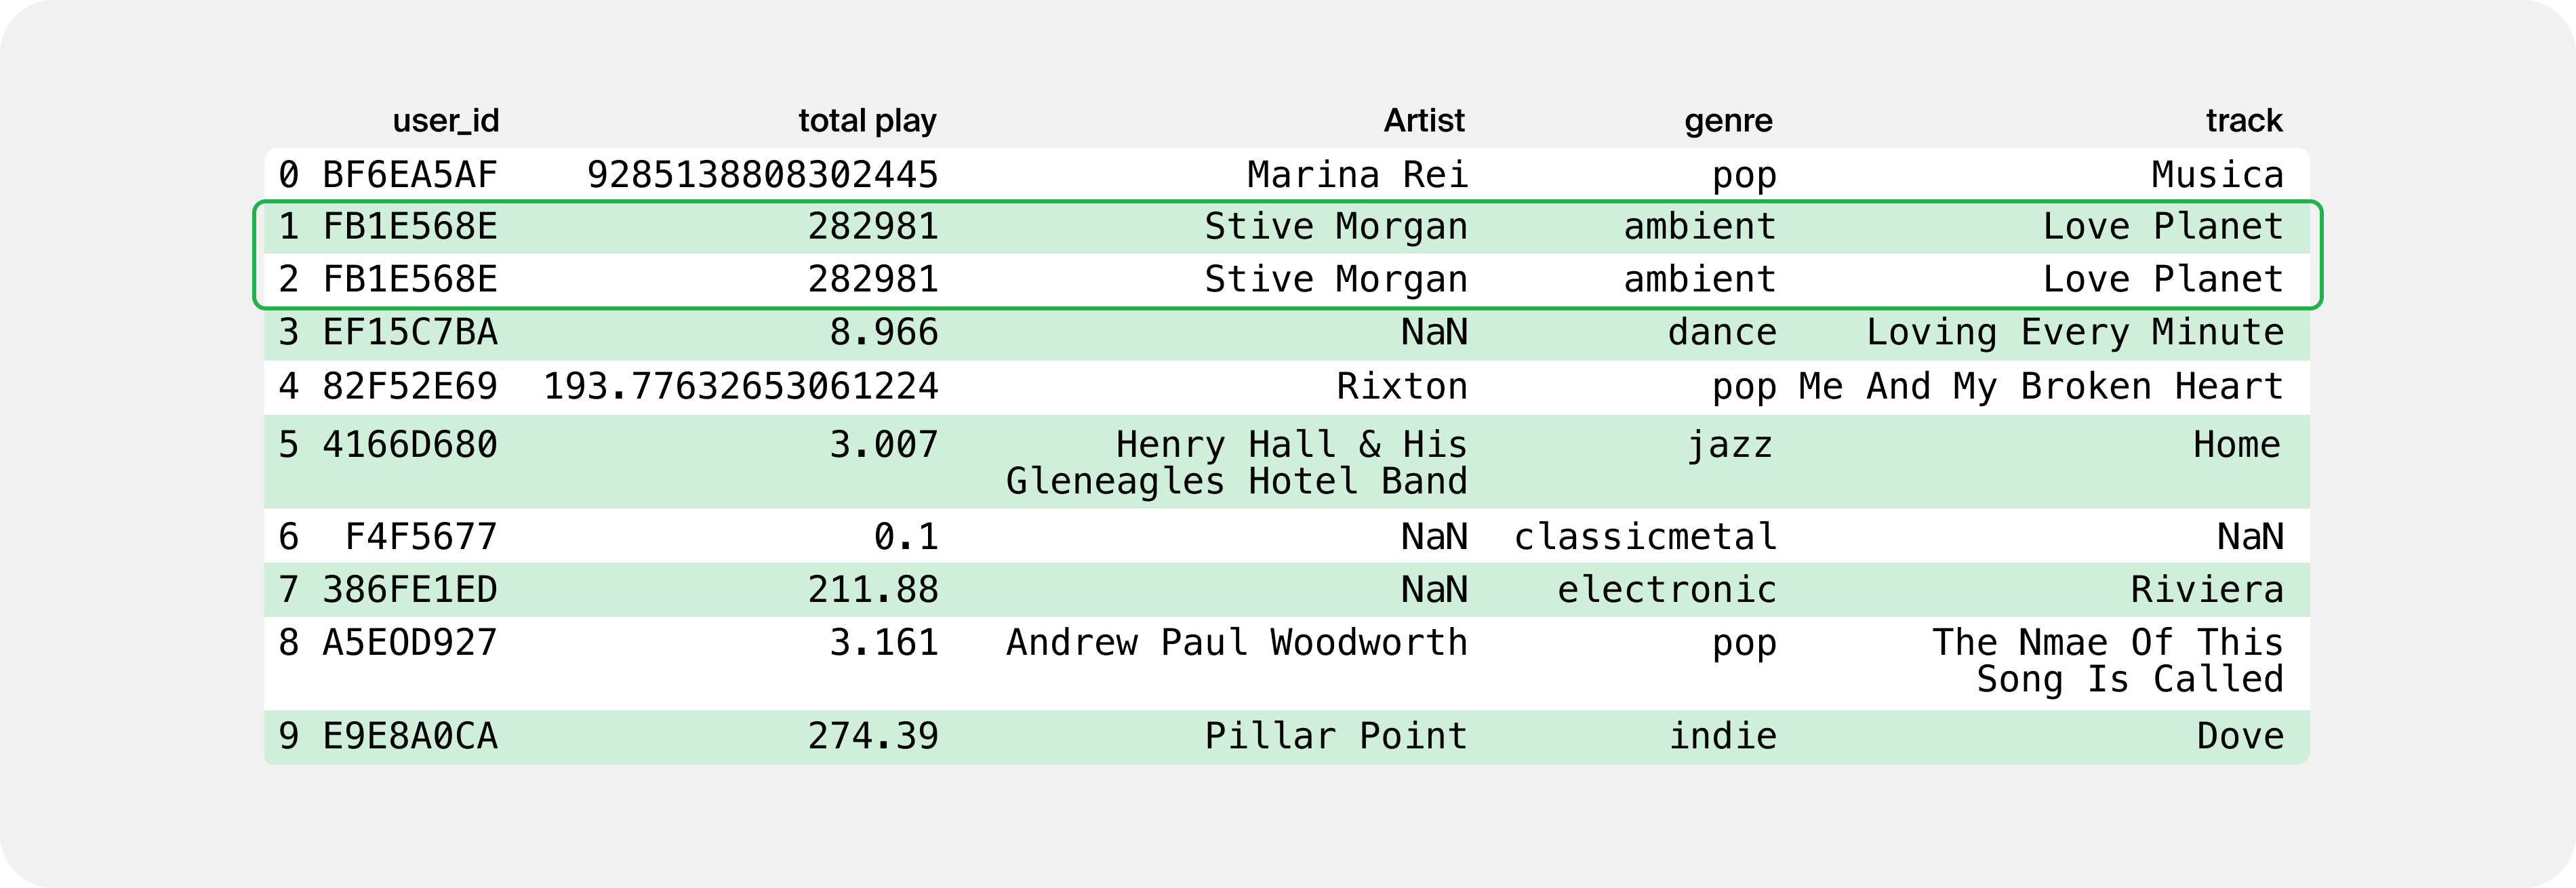

Este dataset nos proporciona un ejemplo de una fila completamente duplicada que puede detectarse fácilmente usando el método duplicated(). Este método funciona de manera similar al método isna(): devuelve True si se duplica un valor y False en caso contrario.

Para contar estos valores, se puede combinar con el método sum():

import pandas as pd

df = pd.read_csv('/datasets/music_log_raw.csv')

print(df.duplicated().sum())
5313

Esos son muchos valores duplicados. Averigüemos cómo eliminarlos. 

Eliminación de duplicados
Para eliminar filas completamente duplicadas, llamaremos al método drop_duplicates():


df = df.drop_duplicates()

print(df.duplicated().sum())
0

Alternativamente, podemos volver a especificar inplace=True para que no haya necesidad de reasignación:


df.drop_duplicates(inplace=True)

print(df.duplicated().sum())
0
Como podemos ver, el resultado es idéntico.

Sin embargo, cuando utilizamos este método, debemos tener en cuenta nuestros índices. Echa un vistazo a las primeras cinco filas después de eliminar los duplicados:


print(df.head())
        user_id          total play                                  Artist      genre              track_name
0  BF6EA5AF           92.851388                              Marina Rei        pop                  Musica
1  FB1E568E          282.981000                            Stive Morgan    ambient             Love Planet
3  EF15C7BA            8.966000                                     NaN      dance     Loving Every Minute
4  82F52E69          193.776327                                  Rixton        pop  Me And My Broken Heart
5  4166D680            3.007000  Henry Hall & His Gleneagles Hotel Band       jazz                    Home
El índice 1 es seguido por el 3 porque el índice 2 ha desaparecido, junto con su fila duplicada. Conviene señalar que en los DataFrames, a diferencia de las listas de Python, los índices siguen siendo los mismos cuando se eliminan las filas.

Cuando eliminas filas, a menudo también es importante actualizar el índice. Para hacerlo, llama al método reset_index(). Esto creará un nuevo DataFrame en el que:

Los índices del DataFrame original se ubicarán en una nueva columna llamada 'index'.

Los nuevos índices se establecerán en orden para todas las filas en el DataFrame.

Así es como restablecemos los índices:

df = df.drop_duplicates().reset_index()

print(df.head())
     index   user_id  total play                                  Artist   
0      0  BF6EA5AF   92.851388                              Marina Rei  \
1      1  FB1E568E  282.981000                            Stive Morgan   
2      3  EF15C7BA    8.966000                                 no_info   
3      4  82F52E69  193.776327                                  Rixton   
4      5  4166D680    3.007000  Henry Hall & His Gleneagles Hotel Band   

     genre                   track  
0      pop                  Musica  
1  ambient             Love Planet  
2    dance     Loving Every Minute  
3      pop  Me And My Broken Heart  
4     jazz                    Home

Como resultado, obtuvimos la enumeración correcta para nuestras filas y también para la columna 'index', que básicamente almacena los índices anteriores. Por lo general, queremos eliminar esta columna 'index'. Para ello, necesitamos establecer el parámetro drop= en True:

df = df.drop_duplicates().reset_index(drop=True)
     user_id   total play                                  Artist    genre   
0  BF6EA5AF   92.851388                              Marina Rei      pop  \
1  FB1E568E  282.981000                            Stive Morgan  ambient   
2  EF15C7BA    8.966000                                     NaN    dance   
3  82F52E69  193.776327                                  Rixton      pop   
4  4166D680    3.007000  Henry Hall & His Gleneagles Hotel Band     jazz   

                    track  
0                  Musica  
1             Love Planet  
2     Loving Every Minute  
3  Me And My Broken Heart  
4                    Home

Como resultado, ahora tenemos índices correctos para nuestro DataFrame, que ya no contiene datos duplicados. Para resumir:

Llamamos al método drop_duplicates() y obtenemos un DataFrame sin duplicados, pero con índices incorrectos.

Luego usamos el método reset_index() para restablecer los índices de las filas y eliminar la columna 'index'.

Aquí tienes algunas ilustraciones que muestran todos los pasos. La de en medio muestra el resultado de restablecer el índice sin eliminar los índices originales.

Detección de duplicados implícitos

La búsqueda de duplicados en columnas que contienen strings puede ser más difícil, pero no es imposible. Para ver todos los valores únicos en una columna, utiliza el método unique(). Este método devuelve todos los valores únicos en una columna especificada. Así es como lo usamos:

print(df['column'].unique())

Para descubrir duplicados menos evidentes, los analistas buscan valores únicos, que pueden incluir:

ortografías alternativas de la misma palabra (por ejemplo, ortografía estadounidense o británica);
faltas de ortografía (por ejemplo, 'jazzz' en lugar de 'jazz');

mayúsculas inconsistentes.

Probemos este método en un pequeño dataset.

El ranking ATP de tenis para 2018 se actualizó 17 veces. Guardaremos todas las versiones en una tabla:

import pandas as pd

rating = ['date', 'name', 'points']

players = [
        ['2018.01.01',  'Rafael Nadal', 10645],
                ['2018.01.08',  'Rafael Nadal', 10600],
                ['2018.01.29',  'Rafael Nadal', 9760],
                ['2018.02.19',  'Roger Federer', 10105], 
                ['2018.03.05',  'Roger Federer', 10060],
                ['2018.03.19',  'Roger Federerr', 9660],
                ['2018.04.02',  'Rafael Nadal Parera', 8770],
                ['2018.06.18',  'Roger Fedrer', 8920],
                ['2018.06.25',  'Rafael Nadal Parera', 8770],
                ['2018.07.16',  'Rafael Nadal Parera', 9310],
                ['2018.08.13',  'Rafael Nadal Parera', 10220],
                ['2018.08.20',  'Rafael Nadal Parera', 10040],
                ['2018.09.10',  'Rafael Nadal Parera', 8760],
                ['2018.10.08',  'Rafael Nadal Parera', 8260],
                ['2018.10.15',  'Rafael Nadal Parera', 7660],
                ['2018.11.05',  'Novak Djokovic', 8045],
                ['2018.11.19',  'Novak Djokovic', 9045]
]

tennis = pd.DataFrame(data=players, columns=rating)

print(tennis)

          date                 name  points
0   2018.01.01         Rafael Nadal   10645
1   2018.01.08         Rafael Nadal   10600
2   2018.01.29         Rafael Nadal    9760
3   2018.02.19        Roger Federer   10105
4   2018.03.05        Roger Federer   10060
5   2018.03.19       Roger Federerr    9660
6   2018.04.02  Rafael Nadal Parera    8770
7   2018.06.18         Roger Fedrer    8920
8   2018.06.25  Rafael Nadal Parera    8770
9   2018.07.16  Rafael Nadal Parera    9310
10  2018.08.13  Rafael Nadal Parera   10220
11  2018.08.20  Rafael Nadal Parera   10040
12  2018.09.10  Rafael Nadal Parera    8760
13  2018.10.08  Rafael Nadal Parera    8260
14  2018.10.15  Rafael Nadal Parera    7660
15  2018.11.05       Novak Djokovic    8045
16  2018.11.19       Novak Djokovic    9045

Llamaremos al método unique() en la columna que almacena los nombres de los jugadores de tenis:

print(tennis['name'].unique())

['Rafael Nadal' 'Roger Federer' 'Roger Federerr' 'Rafael Nadal Parera'
 'Roger Fedrer' 'Novak Djokovic']

Así que tenemos seis nombres. Espera un momento… El nombre de Roger Federer se escribió mal dos veces. Y Rafael Nadal aparece con y sin Parera. ¡Estos son duplicados implícitos!

A veces, solo queremos saber el número de valores únicos en una columna en lugar de los valores en sí. En ese caso, podemos usar el método nunique():

print(tennis['name'].nunique())
6

En nunique(), n representa un número. Como acabamos de ver, esta función devuelve el número de valores únicos. En el ejemplo anterior, vimos que hay seis nombres únicos.

Eliminación de duplicados implícitos

Utiliza el método replace() para corregir la ortografía incorrecta o alternativa. Pasa el valor no deseado de la tabla como primer argumento y el valor correcto como segundo:

tennis['name'] = tennis['name'].replace('Roger Federerr', 'Roger Federer')

tennis['name'] = tennis['name'].replace('Roger Fedrer', 'Roger Federer')

tennis['name'] = tennis['name'].replace('Rafael Nadal', 'Rafael Nadal Parera')

print(tennis)

          date                 name  points
0   2018.01.01  Rafael Nadal Parera   10645
1   2018.01.08  Rafael Nadal Parera   10600
2   2018.01.29  Rafael Nadal Parera    9760
3   2018.02.19        Roger Federer   10105
4   2018.03.05        Roger Federer   10060
5   2018.03.19        Roger Federer    9660
6   2018.04.02  Rafael Nadal Parera    8770
7   2018.06.18        Roger Federer    8920
8   2018.06.25  Rafael Nadal Parera    8770
9   2018.07.16  Rafael Nadal Parera    9310
10  2018.08.13  Rafael Nadal Parera   10220
11  2018.08.20  Rafael Nadal Parera   10040
12  2018.09.10  Rafael Nadal Parera    8760
13  2018.10.08  Rafael Nadal Parera    8260
14  2018.10.15  Rafael Nadal Parera    7660
15  2018.11.05       Novak Djokovic    8045
16  2018.11.19       Novak Djokovic    9045

Tuvimos que llamar al método replace() dos veces. Si hubiéramos tenido más faltas de ortografía, habríamos tenido que volver a llamarlo.

Como siempre, pasar inplace=True produce el mismo resultado sin necesidad de reasignación.

tennis['name'].replace('Roger Federerr', 'Roger Federer', inplace = True)

tennis['name'].replace('Roger Fedrer', 'Roger Federer', inplace = True)

tennis['name'].replace('Rafael Nadal', 'Rafael Nadal Parera', inplace = True)

print(tennis)

          date                 name  points
0   2018.01.01  Rafael Nadal Parera   10645
1   2018.01.08  Rafael Nadal Parera   10600
2   2018.01.29  Rafael Nadal Parera    9760
3   2018.02.19        Roger Federer   10105
4   2018.03.05        Roger Federer   10060
5   2018.03.19        Roger Federer    9660
6   2018.04.02  Rafael Nadal Parera    8770
7   2018.06.18        Roger Federer    8920
8   2018.06.25  Rafael Nadal Parera    8770
9   2018.07.16  Rafael Nadal Parera    9310
10  2018.08.13  Rafael Nadal Parera   10220
11  2018.08.20  Rafael Nadal Parera   10040
12  2018.09.10  Rafael Nadal Parera    8760
13  2018.10.08  Rafael Nadal Parera    8260
14  2018.10.15  Rafael Nadal Parera    7660
15  2018.11.05       Novak Djokovic    8045
16  2018.11.19       Novak Djokovic    9045

Automatización con funciones personalizadas

Para evitar repetir el mismo código varias veces, los profesionales de los datos suelen escribir sus propias funciones. Vamos a crear una función que tome cuatro argumentos:

el DataFrame;

el nombre de la columna donde queremos realizar el reemplazo;
una lista de valores incorrectos;

el valor correcto.

La función reemplazará todos los valores incorrectos por el correcto en la columna seleccionada.

def replace_wrong_values(df, column, wrong_values, correct_value): 

#pasar una lista de valores incorrectos y un string con el valor correcto en la entrada de la función
    for wrong_value in wrong_values: # un bucle sobre nombres mal escritos
        df[column] = df[column].replace(wrong_value, correct_value) # llamar a replace() para cada nombre incorrecto
    return df # devolver el DataFrame modificado

duplicates = ['Roger Federerr', 'Roger Fedrer'] # una lista de nombres mal escritos

name = 'Roger Federer' # el nombre correcto

tennis = replace_wrong_values(tennis, 'name', duplicates, name) # llamar a la función, replace() se llamará dos veces

print(tennis) # el nuevo DataFrame sin duplicados

¿Increíble, no? Ahora ya puedes encontrar y procesar duplicados explícitos e implícitos. Y también tienes tus datos listos para rocanrrolear. En la siguiente lección, comenzarás tu proceso de análisis de datos aprendiendo cómo agrupar datos. ¡Ahora vamos a practicar! ¡No te distraigas!

Práctica guiada

Ejercicio 1

Imagina que trabajas en una plataforma de streaming musical y tienes a tu disposición un conjunto de datos que registra las escuchas de los usuarios. Tu objetivo es limpiar y organizar esta información para obtener una visión más clara de los hábitos de escucha de los usuarios y así poder personalizar mejor las recomendaciones musicales.

Tarea:

Identifica y elimina las filas duplicadas del DataFrame, considerando todas las columnas.
Reinicia el índice de las filas después de eliminar los duplicados.
Cuenta el número de duplicados.

In [ ]:
import pandas as pd

# Carga de datos
df = pd.read_csv('/datasets/music_log_raw.csv')

# Número de duplicados al inicio
print('Número de filas duplicadas (Inicio): ', df.duplicated().sum() )

# Eliminar duplicados y reseteo de índices a nivel de filas
# tu código va aquí

df = df.drop_duplicates().reset_index(drop=True)

print('Número de filas duplicadas (Final): ', df.duplicated().sum())


outputs

Número de filas duplicadas (Inicio):  5313

Número de filas duplicadas (Final):  0

Ejercicio 2

Continuando con nuestro conjunto de datos de streaming musical, queremos conocer la diversidad de géneros musicales que se reproducen en la plataforma.

Tarea:

Identifica los géneros musicales únicos presentes en la columna "genre".
Cuenta cuántos géneros musicales diferentes existen.

In [ ]:
import pandas as pd

# Carga de datos
df = pd.read_csv('/datasets/music_log_raw.csv')

# Identificar los géneros únicos
# Tu código va aquí
géneros_únicos = df['genre'].unique()
print("Géneros musicales únicos:", géneros_únicos)

# Contar la cantidad de géneros únicos
# Tu código va aquí
cantidad_géneros= df['genre'].nunique()
print("Cantidad de géneros diferentes:", cantidad_géneros)

Ejercicio 3

A veces, en los conjuntos de datos, hay duplicados implícitos, como errores ortográficos o variaciones de un mismo valor, lo que puede causar confusión. Por ejemplo, hard-n-heavy y hard'n'heavy pueden ser interpretados como géneros diferentes si no se estandarizan.

Tu objetivo es corregir los duplicados implícitos en la columna genre, reemplazando valores como hard-n-heavy,  hard'n'heavy y  'rancheras' y 'ranchera' asegurando que no haya variaciones en la capitalización de los géneros. Usa el método replace() para realizar esta estandarización.

In [ ]:
import pandas as pd

df = pd.read_csv('/datasets/music_log_raw.csv')

# Estandarización de categorías
df['genre'] = df['genre'].replace('hard-n-heavy',"hard'n'heavy")
df['genre'] = df['genre'].replace('ranchera','rancheras')

# Validación
generos_unicos = df['genre'].dropna().unique()
filtros = [g for g in generos_unicos if g.startswith('har') or g.startswith('ran')]

# Imprimir el resultado
print(filtros)

#["hard'n'heavy", 'hardcore', 'rancheras', 'hardstyle', 'hardtrance']

Ejercicio 4

En conjuntos de datos grandes, los duplicados implícitos (como errores ortográficos o nombres alternativos) son comunes y pueden ser difíciles de manejar manualmente. Es útil escribir funciones personalizadas que detecten y corrijan estos problemas automáticamente.

Escribe una función personalizada que identifique y corrija duplicados implícitos en la columna genre. La función debe buscar patrones comunes de duplicados, como variaciones de nombres o errores tipográficos, y corregirlos.

In [ ]:
import pandas as pd

df = pd.read_csv('/datasets/music_log_raw.csv')

# Definir una función para corregir duplicados implícitos
def corregir_duplicados_implicitos(df, columna, correcciones):
    df[columna] = df[columna].replace(correcciones)
    return df

# Diccionario con correcciones para la columna 'Artist'
correcciones_artistas = {
    'hard-n-heavy': "hard'n'heavy",
    'ranchera': 'rancheras'
}

# Aplicar la función para corregir los duplicados en la columna 'Artist'
df_corregido = corregir_duplicados_implicitos(df, 'genre', correcciones_artistas)

# Validación
géneros_únicos = df['genre'].dropna().unique()
filtros = [g for g in géneros_únicos if g.startswith('har') or g.startswith('ran')]

# Imprimir el resultado
print(filtros)

#output: ["hard'n'heavy", 'hardcore', 'rancheras', 'hardstyle', 'hardtrance']

Actividad práctica

Ejercicio 1

Steam es la plataforma de juegos para PC más popular del mundo, con una extensa colección de más de 6000 juegos y una vasta comunidad de millones de jugadores. Esta diversidad incluye desde grandes éxitos de la industria hasta títulos independientes más pequeños, lo que hace que contar con herramientas efectivas de descubrimiento sea un recurso extremadamente valioso. El conjunto de datos que utilizaremos contiene un registro de los comportamientos de los usuarios en Steam, incluyendo las siguientes columnas:

user-id: identificador único del usuario.

game-title: título del juego.

behavior-name: nombre del comportamiento (compra o jugar).

value: valor que indica la frecuencia o cantidad del comportamiento (1 para compras, otros valores para horas jugadas).

Tarea

Determina el número de filas duplicadas en el dataset. Elimina aquellas filas que se encuentren duplicadas y reinicia los índices del nuevo dataset.

Identifica valores únicos en una columna (títulos de juegos).

Para reducir la variabilidad de los nombres de los juegos, escribe una función que estandarice los caracteres a minúsculas. Utiliza el método str.lower() para ello. Reemplaza los números romanos, comenzando desde el II hasta el V, con números arábigos (2, 3, …).

In [ ]:
import pandas as pd

# Cargar los datos 
df = pd.read_csv("/datasets/steam-200k.csv")
df.columns = ["user_id", "game_title", "behavior_name", "value"]

# 1. Eliminar filas duplicadas
print("Número de filas duplicadas (Inicial): ", df.duplicated().sum())
df_sin_duplicados = df.drop_duplicates()

# Reiniciar los índices
df_sin_duplicados.reset_index(drop=True, inplace=True)

# 2. Mostrar el DataFrame sin duplicados
print("Número de filas duplicadas (Final): ", df_sin_duplicados.duplicated().sum())

# 3. Mostrar valores únicos en la columna 'Game-title'
valores_unicos = df_sin_duplicados["game_title"].unique()
print(f"Valores únicos: {valores_unicos}")

# Mostrar la cantidad de valores únicos en la columna 'Game-title'
cantidad_valores_unicos = df_sin_duplicados["game_title"].nunique()
print(f"Cantidad de valores únicos: {cantidad_valores_unicos}")

# 4. Función para manejar duplicados implícitos
def corregir_duplicados(df):
    # Hacer una copia del DataFrame
    df = df.copy()
    # Mapeo de números romanos a números arábigos
    conversion_roman_to_arabic = {" II": " 2", " III": " 3", " IV": " 4", " V": " 5"}

    for romano, arabico in conversion_roman_to_arabic.items():
        # Convertir títulos de juegos a minúsculas
        df["game_title"] = df["game_title"].str.lower()
        df["game_title"] = df["game_title"].str.replace(romano, arabico)
    return df


# Validación resultados
print()
df_corregido = corregir_duplicados(df_sin_duplicados)
print(df_corregido.head(10))

"""Número de filas duplicadas (Inicial):  707
Número de filas duplicadas (Final):  0
Valores únicos: ['The Elder Scrolls V Skyrim' 'Fallout 4' 'Spore' ... 'Space Colony'
 'Life is Hard' 'Executive Assault']
Cantidad de valores únicos: 5155

     user_id                  game_title behavior_name  value
0  151603712  the elder scrolls v skyrim          play  273.0
1  151603712                   fallout 4      purchase    1.0
2  151603712                   fallout 4          play   87.0
3  151603712                       spore      purchase    1.0
4  151603712                       spore          play   14.9
5  151603712           fallout new vegas      purchase    1.0
6  151603712           fallout new vegas          play   12.1
7  151603712               left 4 dead 2      purchase    1.0
8  151603712               left 4 dead 2          play    8.9
9  151603712                    huniepop      purchase    1.0"""